# Car Features and MSRP Dataet

- `Number of Instances`: **11914**
- `Number of Attributes`: **16**
- `Attributes`<u>(Description of Attributes, according to me which I got from dicussions and Google beacuse it was not given in the [Kaggle](https://www.kaggle.com/CooperUnion/cardataset) page)</u>: 
  - `Make`: Make of a car(BMW, Volkswagen and so on)
  - `Model`: Model of a car
  - `Year`: Year when the car was manufactured
  - `Engine Fuel Type`: Type of fuel engine needs(disel and so on)
  - `Engine HP`: Horsepower of engine
  - `Engine Cylinders`: Number of cylinders in engine
  - `Transmission Type`: Type of transmission(automatic or manual)
  - `Driven Wheels`: front, rear, all
  - `Number of Doors`: Number of doors a car has
  - `Market Category`: luxury, crossover and so on
  - `Vehicle Size`: compact, midsize, large
  - `Vehicle Style`: Style of vehicle(sedan, convertible and so on)
  - `Highway MPG`: miles per gallon(MPG) in highway
  - `City MPG`: miles per gallon(MPG) in city
  - `Popularity`: Number of times the car was mentioned in a Twitter stream
  - `MSRP`: Manufacturer's Suggested Retail Price

## Understand the Business Requirements

**Problem statement:**

`Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.`

## Exploratory Data Analysis(EDA):

In [1]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#to make sure that plots rendered correctly in jupyter notebook

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
car_df = pd.read_csv('archive.zip') #reading the .csv file which is present in archive.zip file 

In [3]:
car_df.head(8) #top 8 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300


In [4]:
#lowercasing all the column names and replacing space with underscores
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

In [5]:
car_df.columns #columns name

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
car_df.dtypes #data type of every column

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
#similary lowercasing all the rows and replacing space with underscores
string_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)
for col in string_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

In [8]:
car_df.sample(4)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170


In [9]:
print(f"The Numbers of Rows and Columns in this data set are: {car_df.shape[0]} rows and {car_df.shape[1]} columns.")

The Numbers of Rows and Columns in this data set are: 11914 rows and 16 columns.


In [10]:
#Concise Summary of the DataFrame
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
#Statistical Summary of DataFrame
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [12]:
#Missing Values
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

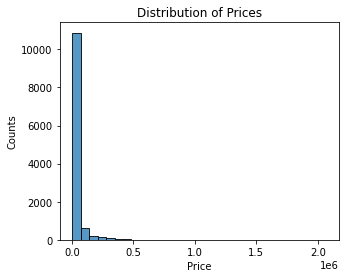

In [13]:
#first step should always be check the distribution of target variable(in my opinion)
plt.figure(figsize=(5,4))
sns.histplot(car_df['msrp'], bins=30)
plt.title("Distribution of Prices")
plt.ylabel("Counts")
plt.xlabel("Price")
plt.show(); 
#as we have seen that max price is 2065902 so in this graph 1e6 means 10^6
#this graph has long tail(imp)

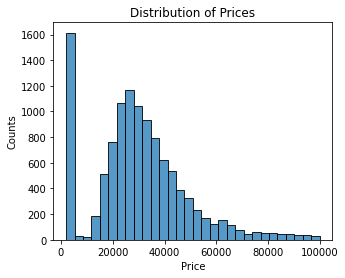

In [14]:
#zooming the above graph 
plt.figure(figsize=(5,4))
sns.histplot(car_df['msrp'][car_df['msrp'] < 100000], bins=30)
plt.title("Distribution of Prices")
plt.ylabel("Counts")
plt.xlabel("Price")
plt.show(); 
#in this graph the long tail make quite difficult to see distribution.
#to solve this problem we have to transform this graph by log transformation

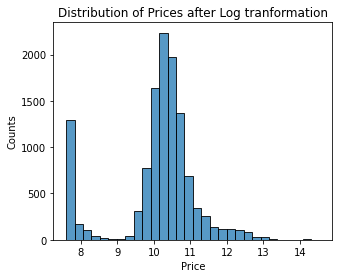

In [15]:
log_price_plus1 =  np.log1p(car_df['msrp']) #``log(1 + x)``

plt.figure(figsize=(5,4))
sns.histplot(log_price_plus1, bins=30)
plt.title("Distribution of Prices after Log tranformation")
plt.ylabel("Counts")
plt.xlabel("Price")
plt.show(); 
# +1 part important in cases that have zeroes.
#as we can see that there is no longer, long tail is present and now the distribution resembles a bell-shaped curve.

## Splitting data into Train, Validation and Test Sets

`Full DataSet is divided into`:
- `20% of data goes to validation`
- `20% of data goes to test`
- `and remainig 60% goes to train`

In [16]:
rows = len(car_df) # No. of Rows in car_df

#calculating how many rows shoulg go to train, validation and test
val_rows = int(0.2*rows)
test_rows = int(0.2*rows)
train_rows = rows - (val_rows+test_rows)

In [17]:
#creating a numpy array with indices from 0 to n-1 and shuffle it.
index = np.arange(rows)
np.random.shuffle(index)

In [18]:
#using above array with indices to get a shuffled dataframe
car_shuffled_df = car_df.iloc[index]

#Split the shuffled datafram into train, validation and test
car_train_df = car_shuffled_df.iloc[:train_rows].copy()
car_val_df = car_shuffled_df.iloc[:val_rows].copy()
car_test_df = car_shuffled_df.iloc[:test_rows].copy()

In [19]:
print(f"Training DataSet: \n ~> Rows: {car_train_df.shape[0]}\n ~> Columns: {car_train_df.shape[1]}")
print(f"Validation DataSet: \n ~> Rows: {car_val_df.shape[0]}\n ~> Columns: {car_val_df.shape[1]}")
print(f"Testing DataSet: \n ~> Rows: {car_test_df.shape[0]}\n ~> Columns: {car_test_df.shape[1]}")

Training DataSet: 
 ~> Rows: 7150
 ~> Columns: 16
Validation DataSet: 
 ~> Rows: 2382
 ~> Columns: 16
Testing DataSet: 
 ~> Rows: 2382
 ~> Columns: 16


In [20]:
#from above analysis we have got long tail in distribution of price and to remove its effect, log transformation is used
y_train = np.log1p(car_train_df['msrp'].values)
y_val = np.log1p(car_val_df['msrp'].values)
y_test = np.log1p(car_test_df['msrp'].values)

In [21]:
car_train_df.drop(['msrp'], axis=1, inplace=True)
car_val_df.drop(['msrp'], axis=1, inplace=True)
car_test_df.drop(['msrp'], axis=1, inplace=True)

In [22]:
car_train_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3381,mazda,cx-7,2010,premium_unleaded_(recommended),244.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,23,17,586
3213,cadillac,cts-v_coupe,2014,premium_unleaded_(required),556.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",midsize,coupe,19,14,1624
11548,scion,xb,2015,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,28,22,105
3352,mazda,cx-5,2014,regular_unleaded,155.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,31,25,586
1666,hyundai,azera,2016,regular_unleaded,293.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,29,20,1439


In [23]:
car_val_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3381,mazda,cx-7,2010,premium_unleaded_(recommended),244.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,23,17,586
3213,cadillac,cts-v_coupe,2014,premium_unleaded_(required),556.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",midsize,coupe,19,14,1624
11548,scion,xb,2015,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,28,22,105
3352,mazda,cx-5,2014,regular_unleaded,155.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,31,25,586
1666,hyundai,azera,2016,regular_unleaded,293.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,29,20,1439


## Linear Regression:

In [24]:
#linear regression implemented with Numpy
def linear_regression(X, y):
    """
    This function is for implementation of Linear regression.
    X = it is matrix(features).
    y = it is a vector(target).
    """
    ones = np.ones(X.shape[0]) #creating an array that contains only 1s.
    X = np.column_stack([ones, X]) #adding the array of 1's as the column of X
    #normal equation formula
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX) #inverse of XTX
    w = XTX_inv.dot(X.T).dot(y) #computing the rest of the normal equation
    
    return w[0], w[1:] #spliting the weight vector into the bias and the rest of the weights 

### Naive solution

In [25]:
naive_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [26]:
def preparing_X(df):
    """
    This function is used to replace all Nan to 0 and assign the values to variable X.
    """
    df_num = df[naive_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [27]:
naive_X_train = preparing_X(car_train_df)

w_0, w = linear_regression(naive_X_train, y_train) #training the model
y_pred = w_0 + naive_X_train.dot(w) #predicting 

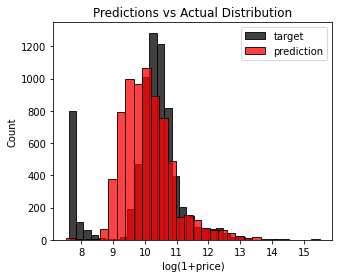

In [28]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();
#from the graph it clear that the prediction aren't good enough.

In [29]:
#perfomace metric RMSE(root mean square error)
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [30]:
print(f"RSME for training is: {round(rmse(y_train, y_pred), 4)}")

# Validating the model
X_val = preparing_X(car_val_df)
y_val_pred = w_0 + X_val.dot(w)

print(f"RSME for validation is: {round(rmse(y_val, y_val_pred), 4)}")

RSME for training is: 0.7629
RSME for validation is: 0.754


In [31]:
def preparing_X(df):
    """
    trying some features engineering, here I'm adding age column which is:
    age = 2017 - year(from main dataframe) 
    then appending this into features.
    """
    df = df.copy()
    features = naive_features.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [32]:
X_train = preparing_X(car_train_df)
w_0, w = linear_regression(X_train, y_train) #training the model
y_pred = w_0 + X_train.dot(w) #predicting 

print(f"RSME for training is: {round(rmse(y_train, y_pred), 4)}")

# Validating the model
X_val = preparing_X(car_val_df)
y_val_pred = w_0 + X_val.dot(w)
print(f"RSME for validation is: {round(rmse(y_val, y_val_pred), 4)}")

RSME for training is: 0.5178
RSME for validation is: 0.5084


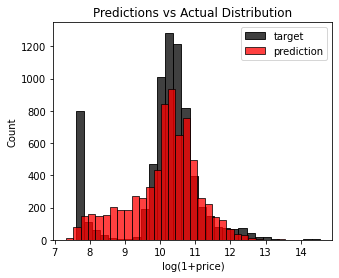

In [33]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();
#with new features, the model follows the orginial distribution closer than previously

In [34]:
car_df['number_of_doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [35]:
car_df['make'].value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [36]:
car_df['engine_fuel_type'].value_counts().head()

regular_unleaded                  7172
premium_unleaded_(required)       2009
premium_unleaded_(recommended)    1523
flex-fuel_(unleaded/e85)           899
diesel                             154
Name: engine_fuel_type, dtype: int64

In [37]:
def preparing_X(df):
    """
    Trying some more simple feature engineering.
    """
    df = df.copy()
    features = naive_features.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for index in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % index #giving a meaning full name
        #creating the one hot encoding feature and adding the feature back to dataframe
        df[feature] = (df['make'] == index).astype(int)
        features.append(feature)
        
    for index in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']:
        feature = 'is_type_%s' % index
        df[feature] = (df['engine_fuel_type'] == index).astype(int)
        features.append(feature)
    
    for index in [2, 3, 4]: 
        feature = 'num_doors_%s' % index 
        df[feature] = (df['number_of_doors'] == index).astype(int) 
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = preparing_X(car_train_df)
w_0, w = linear_regression(X_train, y_train) #training the model
y_pred = w_0 + X_train.dot(w) #predicting 

print(f"RSME for training is: {round(rmse(y_train, y_pred), 4)}")

# Validating the model
X_val = preparing_X(car_val_df)
y_val_pred = w_0 + X_val.dot(w)
print(f"RSME for validation is: {round(rmse(y_val, y_val_pred), 4)}")

RSME for training is: 0.4751
RSME for validation is: 0.4692


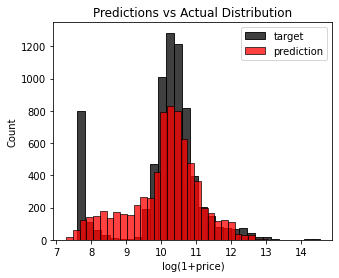

In [39]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();
#with new features, the model follows the orginial distribution closer than previously

In [40]:
car_df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [41]:
naive_features

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [42]:
car_df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [43]:
car_df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [44]:
car_df['market_category'].value_counts().head(4)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
Name: market_category, dtype: int64

In [45]:
car_df['vehicle_size'].value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [46]:
car_df['vehicle_style'].value_counts().head(4)

sedan          3048
4dr_suv        2488
coupe          1211
convertible     793
Name: vehicle_style, dtype: int64

In [47]:
def preparing_X(df):
    """
    Trying some more simple feature engineering.
    """
    df = df.copy()
    features = naive_features.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for index in ['chevrolet', 'ford', 'volkswagen', 'toyota']:
        feature = 'is_make_%s' % index #giving a meaning full name
        #creating the one hot encoding feature and adding the feature back to dataframe
        df[feature] = (df['make'] == index).astype(int)
        features.append(feature)
        
    for index in ['regular_unleaded', 'premium_unleaded_(required)',
                  'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % index
        df[feature] = (df['engine_fuel_type'] == index).astype(int)
        features.append(feature)
    
    for index in ['automatic', 'manual', 'automated_manual', 'direct_drive']:
        feature = 'is_tranmission_%s' % index
        df[feature] = (df['transmission_type'] == index).astype(int)
        features.append(feature)
    
#     for index in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
#         feature = 'is_driven_wheel_%s' % index
#         df[feature] = (df['driven_wheels'] == index).astype(int)
#         features.append(feature)
    
    for index in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance']:
        feature = 'is_market_category_%s' % index
        df[feature] = (df['market_category'] == index).astype(int)
        features.append(feature)
    
#     for index in ['compact', 'midsize', 'large']:
#         feature = 'is_vehicle_size_%s' % index
#         df[feature] = (df['vehicle_size'] == index).astype(int)
#         features.append(feature)
    
    
#     this features give LinAlgError which means it is not possible to find an inverse for this matrix.
#     If we try to invert a singular matrix, Numpy will raise an error which is LinAlgError: Singular Matrix
#     this also happens in features which are multiple of each other by some constant(imp) or prefect linear combination
#     for index in ['sedan', 'dr_suv', 'coupe', 'convertible']:
#         feature = 'is_vehicle_style_%s' % index
#         df[feature] = (df['vehicle_style'] == index).astype(int)
#         features.append(feature)

    for index in [2, 3, 4]: 
        feature = 'num_doors_%s' % index 
        df[feature] = (df['number_of_doors'] == index).astype(int) 
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#all the commented features are not useful

In [48]:
X_train = preparing_X(car_train_df)
w_0, w = linear_regression(X_train, y_train) #training the model
y_pred = w_0 + X_train.dot(w) #predicting 

print(f"RSME for training is: {round(rmse(y_train, y_pred), 4)}")

# Validating the model
X_val = preparing_X(car_val_df)
y_val_pred = w_0 + X_val.dot(w)
print(f"RSME for validation is: {round(rmse(y_val, y_val_pred), 4)}")

RSME for training is: 0.4666
RSME for validation is: 0.4566


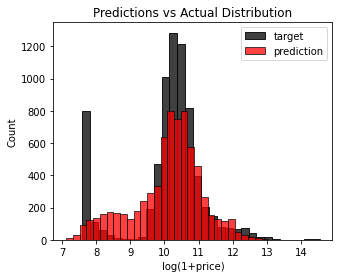

In [49]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();
#with new features, the model follows the orginial distribution closer than previously

# Regularization

- `Regularized Linear Regression is often called Ridge Regression`.

In [50]:
def linear_regression_reg(X, y, r=0.0):
    """
    This function is for implementation of Regularized Linear regression.
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0]) 
    #adding r to the main diagonal of XTX
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [51]:
X_train = preparing_X(car_train_df)

In [52]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w) #predicting 
    print(f"RSME for training when r = {r} is: {round(rmse(y_train, y_pred), 6)}")
    # Validating the model
    X_val = preparing_X(car_val_df)
    y_val_pred = w_0 + X_val.dot(w)
    print(f"RSME for validation when r = {r} is: {round(rmse(y_val, y_val_pred), 6)}")
    print('-'*15)

RSME for training when r = 0 is: 0.466559
RSME for validation when r = 0 is: 0.456635
---------------
RSME for training when r = 0.001 is: 0.466559
RSME for validation when r = 0.001 is: 0.456634
---------------
RSME for training when r = 0.01 is: 0.466559
RSME for validation when r = 0.01 is: 0.456634
---------------
RSME for training when r = 0.1 is: 0.46662
RSME for validation when r = 0.1 is: 0.456712
---------------
RSME for training when r = 1 is: 0.468462
RSME for validation when r = 1 is: 0.459398
---------------
RSME for training when r = 10 is: 0.488222
RSME for validation when r = 10 is: 0.482009
---------------


In [53]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w) #predicting 
    print(f"RSME for training when r = {r} is: {round(rmse(y_train, y_pred), 6)}")
    # Validating the model
    X_val = preparing_X(car_val_df)
    y_val_pred = w_0 + X_val.dot(w)
    print(f"RSME for validation when r = {r} is: {round(rmse(y_val, y_val_pred), 6)}")
    print('-'*15)

RSME for training when r = 1e-06 is: 0.466559
RSME for validation when r = 1e-06 is: 0.456635
---------------
RSME for training when r = 0.0001 is: 0.466559
RSME for validation when r = 0.0001 is: 0.456635
---------------
RSME for training when r = 0.001 is: 0.466559
RSME for validation when r = 0.001 is: 0.456634
---------------
RSME for training when r = 0.01 is: 0.466559
RSME for validation when r = 0.01 is: 0.456634
---------------
RSME for training when r = 0.1 is: 0.46662
RSME for validation when r = 0.1 is: 0.456712
---------------
RSME for training when r = 1 is: 0.468462
RSME for validation when r = 1 is: 0.459398
---------------
RSME for training when r = 5 is: 0.476843
RSME for validation when r = 5 is: 0.469861
---------------
RSME for training when r = 10 is: 0.488222
RSME for validation when r = 10 is: 0.482009
---------------
